In [2]:
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt


In [74]:
credit_card = pd.read_csv(r"C:\Users\ezeab\Downloads\archive (2)\Credit card transactions - India - Simple.csv", index_col=0, parse_dates=['Date'])
credit_card['Date'] = credit_card['Date'].astype('datetime64[ns]')
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [67]:
# changing date column format
credit_card['Date'] = pd.to_datetime(credit_card['Date'])
credit_card['Date'] = credit_card['Date'].dt.strftime("%d-%m-%y")
# stripping 'india' from city names 
credit_card['City'] = credit_card['City'].str.replace(', India', '')
credit_card.head()

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,Delhi,29-10-14,Gold,Bills,F,82475
1,Greater Mumbai,22-08-14,Platinum,Bills,F,32555
2,Bengaluru,27-08-14,Silver,Bills,F,101738
3,Greater Mumbai,12-04-14,Signature,Bills,F,123424
4,Bengaluru,05-05-15,Gold,Bills,F,171574


In [62]:
print(credit_card.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB
None


In [5]:
# checking for missing values
print(credit_card.isna().sum())

City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64


In [52]:
# grouping by city to find out the highest spenders
city = credit_card.groupby('City')['Amount'].sum().sort_values(ascending=True)
highest_spenders = ['Greater Mumbai','Bengaluru','Ahmedabad','Delhi','Kolkata']
highest = credit_card.isin(highest_spenders)

index
0         True
1         True
2         True
3         True
4         True
         ...  
26047     True
26048    False
26049    False
26050    False
26051    False
Name: City, Length: 26052, dtype: bool

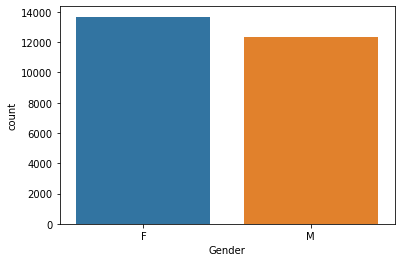

In [15]:
sns.countplot(x='Gender', data=credit_card)
plt.show()

In [18]:
credits_sample = credit_card.groupby('Gender').sample(n=21, random_state=234)
credit_card.value_counts(normalize=True)

City       Date      Card Type  Exp Type       Gender  Amount
Achalpur   05-04-15  Gold       Bills          F       209805    0.000038
Jaipur     24-10-13  Gold       Fuel           M       232754    0.000038
           25-01-15  Gold       Bills          F       296088    0.000038
           25-01-14  Silver     Travel         M       21200     0.000038
           24-12-14  Gold       Travel         M       282876    0.000038
                                                                   ...   
Delhi      02-03-14  Gold       Grocery        M       42529     0.000038
                                Food           F       134861    0.000038
                                Entertainment  F       200915    0.000038
           02-02-15  Silver     Entertainment  F       90817     0.000038
Zunheboto  29-03-14  Silver     Grocery        M       298567    0.000038
Length: 26052, dtype: float64

In [83]:
#groupby card type and plot based on total amount spent
cards_grouped = credit_card.groupby(['Card Type', 'Gender'])['Amount'].sum()
cards_grouped

Card Type  Gender
Gold       F         522932183
           M         461607353
Platinum   F         531940229
           M         475698790
Signature  F         548005149
           M         465035956
Silver     F         602433469
           M         467180244
Name: Amount, dtype: int64

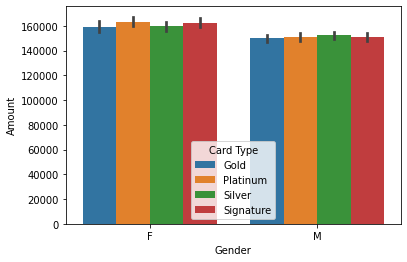

In [45]:
sns.barplot(x='Gender', y='Amount', data=credit_card, hue='Card Type')
plt.show()

In [84]:
#sample by card type, stratified sampling
sample = credit_card.groupby('Card Type').sample(frac=0.3, random_state=2023)